In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("Abhi5ingh/Dresscodepromptsketch")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/48380 [00:00<?, ? examples/s]

In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab/dress_images'):
    os.mkdir('/content/drive/MyDrive/Colab/dress_images')

In [ ]:
from tqdm.auto  import tqdm
for i in tqdm(range(1500)):
    dataset['train'][i]['image'].save(f'/content/drive/MyDrive/Colab/dress_images/{i}.jpg')

  0%|          | 0/1500 [00:00<?, ?it/s]

In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab/dress_sketch'):
    os.mkdir('/content/drive/MyDrive/Colab/dress_sketch')

In [ ]:
from tqdm.auto  import tqdm
for i in tqdm(range(1500)):
    dataset['train'][i]['sketch'].save(f'/content/drive/MyDrive/Colab/dress_sketch/{i}.jpg')

  0%|          | 0/1500 [00:00<?, ?it/s]

In [ ]:
from PIL import Image

In [ ]:
import os

In [ ]:
base_path_sketch ='/content/drive/MyDrive/Colab/dress_sketch'

In [ ]:
base_path_images = '/content/drive/MyDrive/Colab/dress_images'

In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab/merged_images'):
    os.mkdir('/content/drive/MyDrive/Colab/merged_images')

In [ ]:
output_path = '/content/drive/MyDrive/Colab/merged_images'

In [ ]:
for i in range(0,1500):
    # Construct file paths for images
    image_path = os.path.join(base_path_images, f'{i}.jpg')
    sketch_path = os.path.join(base_path_sketch, f'{i}.jpg')

    # Create a list to store opened images
    images = [Image.open(image_path), Image.open(sketch_path)]

    # Calculate the total width and height for the new image
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    # Create a new image with the calculated dimensions
    image_new = Image.new('RGB', (total_width, max_height))

    # Paste each image onto the new image
    current_width = 0
    for img in images:
        image_new.paste(img, (current_width, 0))
        current_width += img.width

    # Save the merged image with a distinct name
    output_file_path = os.path.join(output_path, f'merged_image_{i}.png')
    image_new.save(output_file_path)

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, LeakyReLU
from keras.layers import Conv2DTranspose, Dropout, ReLU, Input, Concatenate, ZeroPadding2D
from keras.optimizers import Adam
from keras.utils import plot_model


In [ ]:
BATCH_SIZE = 1
IMAGE_SIZE = 256

In [ ]:
def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image, channels=3)
    w = tf.shape(image)[1]
    w = w//2
    real_image = image[:, :w, :]
    input_image = image[:, w:, :]

    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)
    return input_image, real_image

In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab/test_images'):
    os.mkdir('/content/drive/MyDrive/Colab/test_images')

In [ ]:
for i in range(0,1000):
    # Construct file paths for images
    image_path = os.path.join(base_path_images, f'{i}.jpg')
    sketch_path = os.path.join(base_path_sketch, f'{i}.jpg')

    # Create a list to store opened images
    images = [Image.open(image_path), Image.open(sketch_path)]

    # Calculate the total width and height for the new image
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    # Create a new image with the calculated dimensions
    image_new = Image.new('RGB', (total_width, max_height))

    # Paste each image onto the new image
    current_width = 0
    for img in images:
        image_new.paste(img, (current_width, 0))
        current_width += img.width

    # Save the merged image with a distinct name
    output_file_path = os.path.join(output_path, f'test_image_{i}.png')
    image_new.save(output_file_path)

In [ ]:
path = '/content/drive/MyDrive/Colab/merged_images'
x,y = load(os.path.join(path,"merged_image_1.png"))
print(x.shape, y.shape)
path1='/content/drive/MyDrive/Colab/test_images'

(1024, 768, 3) (1024, 768, 3)


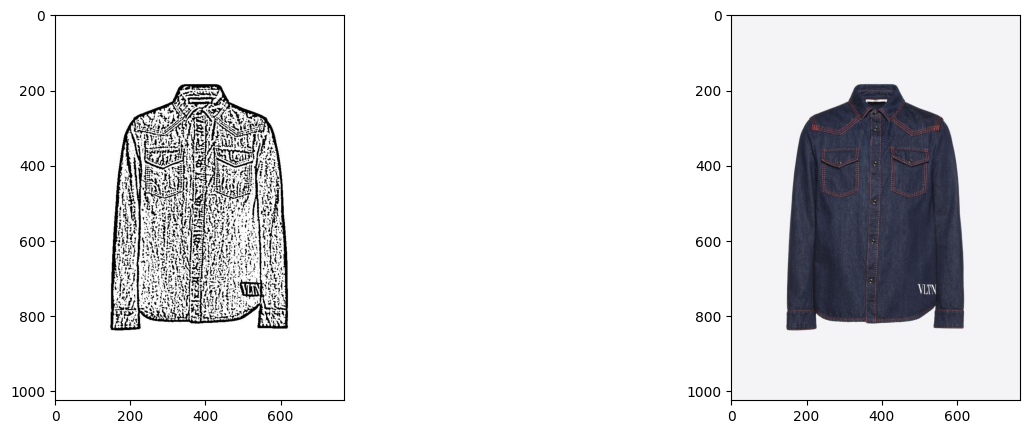

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
axes[0].imshow(x/255.0)
axes[1].imshow(y/255.0)

In [ ]:
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1
    return input_image, real_image

In [ ]:
def resize(input_image, real_image):
    input_image = tf.image.resize(input_image, [IMAGE_SIZE, IMAGE_SIZE], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [IMAGE_SIZE, IMAGE_SIZE], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image, real_image

In [ ]:
def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis = 0)
    cropped_image = tf.image.random_crop(stacked_image, size = [2, IMAGE_SIZE, IMAGE_SIZE, 3])
    return cropped_image[0], cropped_image[1]

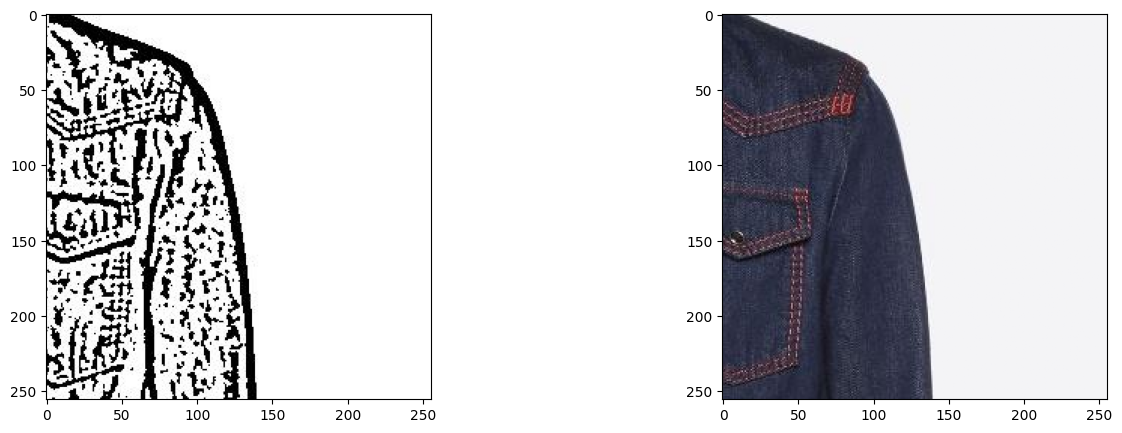

In [ ]:
x_aug, y_aug = random_crop(x, y)
fig, axes = plt.subplots(1,2, figsize = (16,5))
axes[0].imshow(x_aug/255.0)
axes[1].imshow(y_aug/255.0)

In [ ]:
def random_jitter(input_image, real_image):
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)
    return input_image, real_image

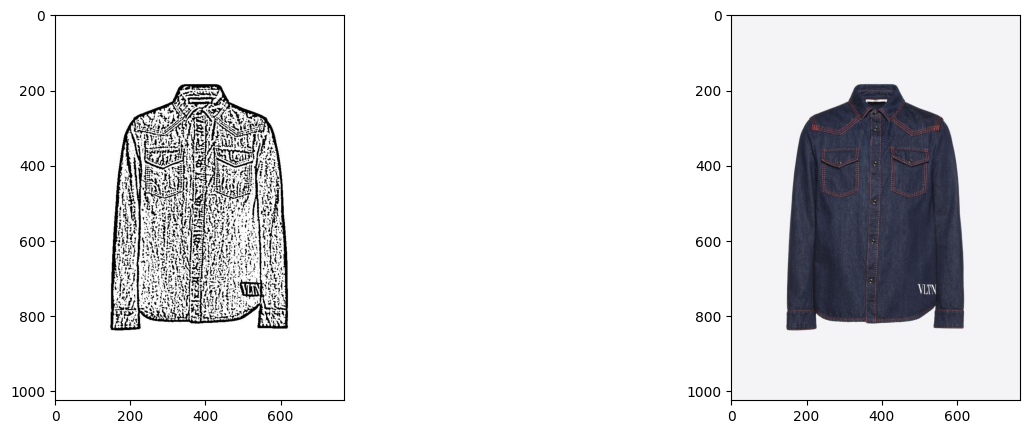

In [ ]:
x_jit, y_jit = random_jitter(x, y)
fig, axes = plt.subplots(1,2, figsize = (16,5))
axes[0].imshow(x_jit/255.0)
axes[1].imshow(y_jit/255.0)

In [ ]:
def load_train_images(image_path):
    input_image, real_image = load(image_path)
    input_image, real_image = resize(input_image, real_image)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image,real_image

In [ ]:
def load_test_image(image_path):
    input_image, real_image = load(image_path)
    input_image, real_image = resize(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

In [ ]:
# create input pipeline
train_dataset = tf.data.Dataset.list_files(path +"/merged_image_*.png")
train_dataset = train_dataset.map(load_train_images)
train_dataset = train_dataset.shuffle(10).batch(BATCH_SIZE)
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>

In [ ]:
test_dataset = tf.data.Dataset.list_files(path +"/merged_image_*.png")
test_dataset = test_dataset.map(load_test_image)
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>

In [ ]:
def downsample(filters, size, batchnorm = True):
    init = tf.random_normal_initializer(0.,0.02)
    result = Sequential()
    result.add(Conv2D(filters, size, strides = 2, padding = "same", kernel_initializer = init, use_bias = False))
    if batchnorm == True:
        result.add(BatchNormalization())

    result.add(LeakyReLU())
    return result
down_model = downsample(3,4)
down_result = down_model(tf.expand_dims(x, axis = 0))
print(down_result.shape)

(1, 512, 384, 3)


In [ ]:
def upsample(filters, size, dropout = False):
    init = tf.random_normal_initializer(0, 0.02)
    result = Sequential()
    result.add(Conv2DTranspose(filters, size, strides = 2, padding = "same", kernel_initializer = init, use_bias = False))
    result.add(BatchNormalization())
    if dropout == True:
        result.add(Dropout(0.5))
    result.add(ReLU())
    return result
up_model = upsample(3,4)
up_result = up_model(down_result)
print(up_result.shape)

(1, 1024, 768, 3)


In [ ]:
def generator():
    inputs = Input(shape = [IMAGE_SIZE, IMAGE_SIZE, 3])
    down_stack = [
        downsample(64, 4, batchnorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4)
    ]


    up_stack = [
        upsample(512, 4, dropout=True),
        upsample(512, 4, dropout=True),
        upsample(512, 4),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]
    init = tf.random_normal_initializer(0., 0.02)
    last = Conv2DTranspose(3, 4, strides = 2, padding = "same", kernel_initializer = init, activation ="tanh")
    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    x = last(x)
    return Model(inputs = inputs, outputs = x)

In [ ]:
gen = generator()
gen.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 128, 128, 64)         3072      ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 64, 64, 128)          131584    ['sequential_2[0][0]']        
                                                                                                  
 sequential_4 (Sequential)   (None, 32, 32, 256)          525312    ['sequential_3[0][0]']        
                                                                                              

In [ ]:
%pip install pydot

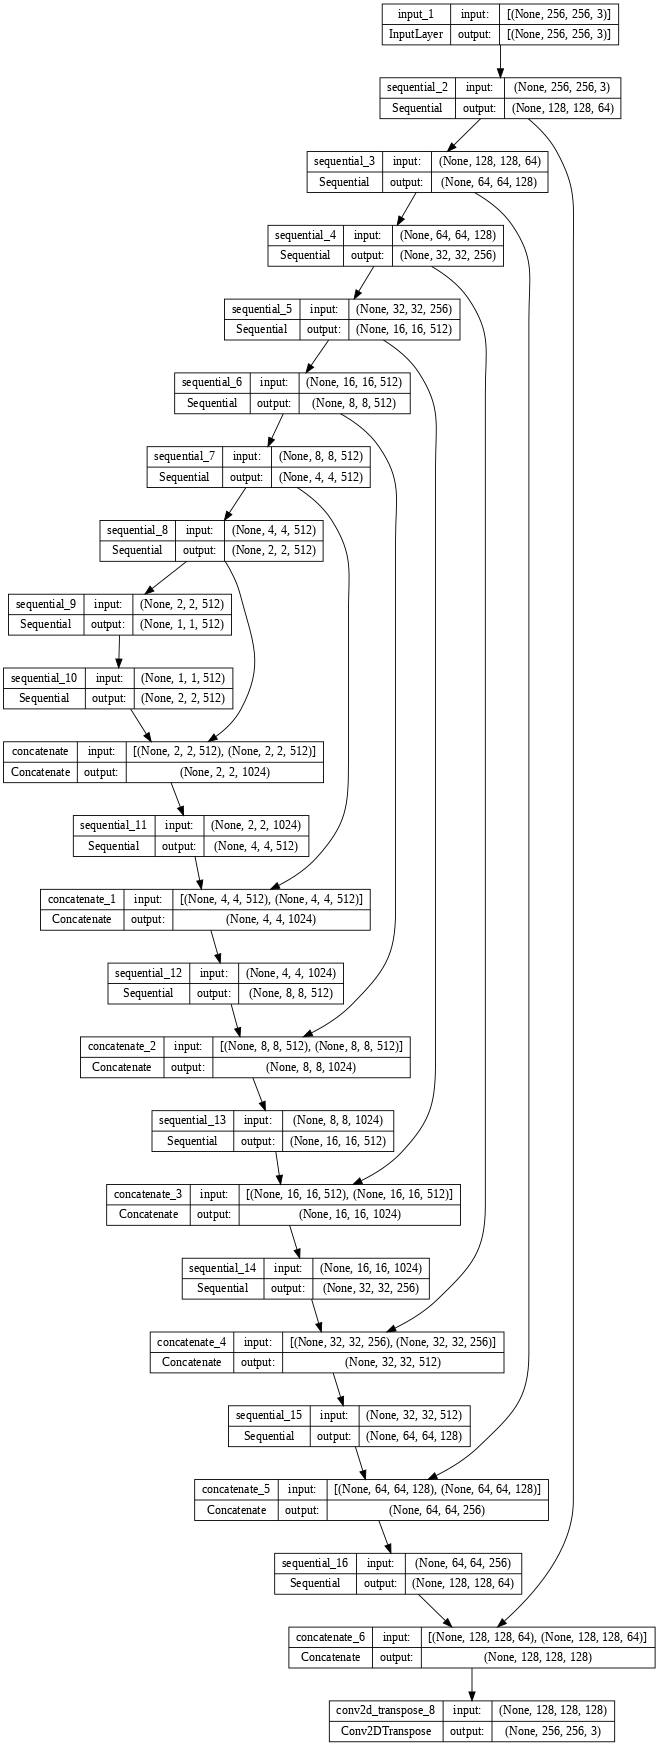

In [ ]:
plot_model(gen, show_shapes=True, dpi = 64)

In [ ]:
LAMBDA = 100

In [ ]:
from keras.losses import BinaryCrossentropy
loss_function = BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_function(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)
    return total_gen_loss, gan_loss, l1_loss

In [ ]:
def discriminator():
    init = tf.random_normal_initializer(0., 0.02)

    inp = Input(shape = [IMAGE_SIZE, IMAGE_SIZE, 3], name = "input_image")
    tar = Input(shape = [IMAGE_SIZE, IMAGE_SIZE, 3], name = "target_image")
    x = Concatenate()([inp, tar])
    down1 = downsample(64,4,False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)

    zero_pad1 = ZeroPadding2D()(down3)
    conv = Conv2D(256, 4, strides = 1, kernel_initializer = init, use_bias = False)(zero_pad1)
    leaky_relu = LeakyReLU()(conv)
    zero_pad2 = ZeroPadding2D()(leaky_relu)
    last = Conv2D(1, 4, strides = 1, kernel_initializer=init)(zero_pad2)
    return Model(inputs = [inp, tar], outputs = last)

In [ ]:
disc = discriminator()
disc.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 target_image (InputLayer)   [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 concatenate_7 (Concatenate  (None, 256, 256, 6)          0         ['input_image[0][0]',         
 )                                                                   'target_image[0][0]']        
                                                                                                  
 sequential_17 (Sequential)  (None, 128, 128, 64)         6144      ['concatenate_7[0][0]'] 

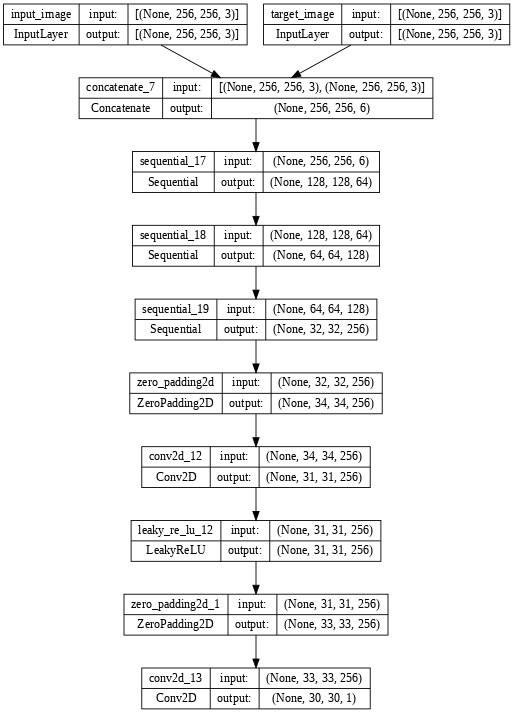

In [ ]:
plot_model(disc, show_shapes=True, dpi = 64)

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_function(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_function(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss


In [ ]:
generator_optimizer = Adam(lr= 2e-4, beta_1=0.5)
discriminator_optimizer = Adam(lr = 2e-4, beta_1=0.5)

In [ ]:
def save_images(model, test_input, target, epoch):
    prediction = model(test_input, training= True)
    plt.figure(figsize = (15,15))
    display_list= [prediction[0]]

    for i in range(len(test_input)):
        plt.subplot(1, len(test_input), i+1)

        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis("off")
    plt.savefig(f"/content/drive/MyDrive/Colab/output/epoch_{epoch}.jpg")
    plt.close()

In [ ]:
epochs = 1

In [ ]:
@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = gen(input_image, training = True)

        disc_real_output = disc([input_image, target], training = True)
        disc_generated_output = disc([input_image, gen_output], training = True)
        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)
        generator_gradients = gen_tape.gradient(gen_total_loss, gen.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, disc.trainable_variables)
        generator_optimizer.apply_gradients(zip(generator_gradients, gen.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, disc.trainable_variables))
        return gen_total_loss, disc_loss

In [ ]:
def fit(train_dataset, epochs, test_dataset):
    for epoch in range(epochs):
        start = time.time()
        for input_, target in test_dataset.take(1):
            save_images(gen, input_, target, epoch)
        # Train
        print(f"Epoch {epoch}")
        for n, (input_, target) in train_dataset.enumerate():
            gen_loss, disc_loss = train_step(input_, target, epoch)
        print("Generator loss {:.2f} Discriminator loss {:.2f}".format(gen_loss, disc_loss))
        print("Time take for epoch {} is {} sec\n".format(epoch+1, time.time() - start))

In [ ]:

import keras
keras.backend.clear_session()

In [ ]:
fit(train_dataset, epochs, test_dataset)

Epoch 0


In [ ]:
import os
if not os.path.exists('/content/drive/MyDrive/Colab/output'):
    os.mkdir('/content/drive/MyDrive/Colab/output')

In [ ]:
epoch = 0
filename = f"/content/drive/MyDrive/Colab/output/epoch_{epoch}.jpg"
!ls filename

ls: cannot access 'filename': No such file or directory
